In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sgemm_product.csv')

In [4]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [5]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [6]:
df.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [7]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [8]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [9]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [10]:
df1 = df.sample(n=5000, random_state=0)


In [11]:
X = df1.iloc[:,:]
print(X.shape,)

(5000, 15)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X

array([[-0.38027308,  1.16791265, -1.22117997, ..., -1.03087646,
         1.00561577,  1.74127624],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
        -0.99441559, -0.47643727],
       [ 1.12814851, -1.49075029, -1.22117997, ..., -1.03087646,
        -0.99441559, -0.38599717],
       ...,
       [-1.13448388,  1.16791265, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46244742],
       [-0.38027308, -1.49075029, -1.22117997, ...,  0.97004834,
        -0.99441559, -0.46692417],
       [-1.13448388,  1.16791265,  0.81888012, ..., -1.03087646,
         1.00561577, -0.46152858]])

# PCA 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf

,principal component 1,principal component 2
0,1.237188,-0.936636
1,0.427564,-2.224919
2,-0.461569,-0.284741
3,-0.198437,1.230541
4,1.467021,1.713618
...,...,...
4995,0.798714,0.818460
4996,0.705414,-0.538167
4997,-0.487938,-1.150684
4998,-0.712520,-1.745256


In [16]:
print(pca.components_)

[[ 0.43507372  0.37979685 -0.02726148 -0.11808039 -0.20765144 -0.0349575
  -0.06181271 -0.01208162  0.36315453  0.30928554  0.04948974  0.00170998
   0.01565796 -0.01341114  0.61078242]
 [ 0.39638142  0.08545895  0.08446132  0.24088475  0.33543818  0.45760479
   0.55820232  0.01344849  0.08181548 -0.34885528 -0.0446854  -0.0654566
   0.00255588 -0.01310323  0.04329434]]


In [17]:
print(pca.explained_variance_)

[1.71552482 1.42782888]


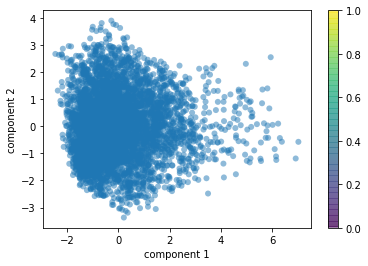

In [23]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            #c=digits.target, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow_r'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

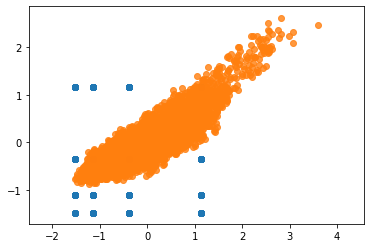

In [19]:
X_new = pca.inverse_transform(principalComponents)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# K-Means Clustering

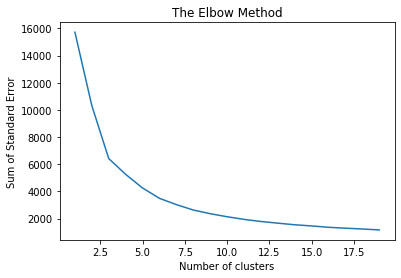

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [27]:
X1 = pd.DataFrame(principalDf)
X1

,principal component 1,principal component 2
0,1.237188,-0.936636
1,0.427564,-2.224919
2,-0.461569,-0.284741
3,-0.198437,1.230541
4,1.467021,1.713618
...,...,...
4995,0.798714,0.818460
4996,0.705414,-0.538167
4997,-0.487938,-1.150684
4998,-0.712520,-1.745256


In [28]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

In [29]:
y_kmeans

array([0, 7, 5, ..., 9, 9, 5])

In [30]:
clustersDf = pd.DataFrame(y_kmeans)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X1, clustersDf], axis = 1).reset_index()

In [31]:
combinedDf = combinedDf.drop(columns= 'index')

In [32]:
combinedDf

,principal component 1,principal component 2,cluster_predicted
0,1.237188,-0.936636,0
1,0.427564,-2.224919,7
2,-0.461569,-0.284741,5
3,-0.198437,1.230541,1
4,1.467021,1.713618,8
...,...,...,...
4995,0.798714,0.818460,8
4996,0.705414,-0.538167,0
4997,-0.487938,-1.150684,9
4998,-0.712520,-1.745256,9


In [33]:
np.unique(combinedDf['cluster_predicted'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run'],
      dtype='object')

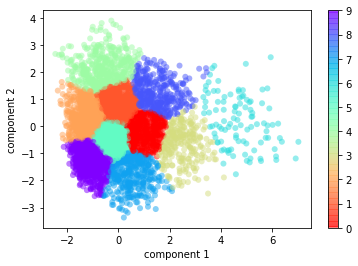

In [35]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=combinedDf['cluster_predicted'], 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow_r'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# ICA

In [36]:
from sklearn.decomposition import FastICA

In [37]:
fs_ica = FastICA(n_components=2,random_state=0)

In [38]:
X_transformed = fs_ica.fit_transform(X)

In [39]:
X_transformed

array([[ 1.51528585e-02, -8.62940037e-03],
       [ 9.27644166e-03, -2.48402597e-02],
       [-4.27990947e-03, -4.29502999e-03],
       ...,
       [-2.54645294e-03, -1.40937500e-02],
       [-3.92700742e-03, -2.17748140e-02],
       [-8.53558208e-05, -1.55449916e-03]])

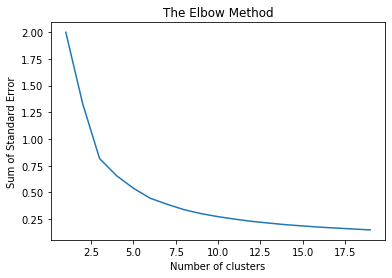

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [41]:
kmeans_1 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans_1.fit_predict(X_transformed)

In [42]:
y_kmeans1

array([4, 4, 3, ..., 0, 0, 3])

In [43]:
clustersDf1 = pd.DataFrame(y_kmeans1)
X_transformed = pd.DataFrame(X_transformed)
clustersDf1.columns = ['cluster_predicted']
combinedDf1 = pd.concat([X_transformed, clustersDf1], axis = 1).reset_index()

In [44]:
combinedDf1 = combinedDf1.drop(columns= 'index')

In [45]:
combinedDf1

,0,1,cluster_predicted
0,0.015153,-0.008629,4
1,0.009276,-0.024840,4
2,-0.004280,-0.004295,3
3,-0.004746,0.013789,2
4,0.011927,0.022668,1
...,...,...,...
4995,0.006786,0.011136,1
4996,0.008493,-0.004932,3
4997,-0.002546,-0.014094,0
4998,-0.003927,-0.021775,0


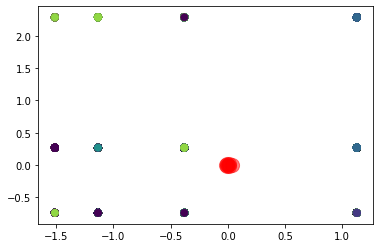

In [46]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans1, s=50, cmap='viridis')

centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# Random Projection

In [47]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components=3)

In [48]:
X_transformed1 = rp.fit_transform(X[:, :14])
X_transformed1

array([[ 0.35008094, -1.66677926, -2.16788698],
       [ 0.94546505,  0.04499465,  0.2401712 ],
       [ 0.94546505, -3.30454598,  0.06647109],
       ...,
       [ 0.34908316,  0.3989286 , -1.99418687],
       [ 0.94521101, -3.30454598, -3.10983292],
       [ 0.35008094,  2.29644976,  1.17905119]])

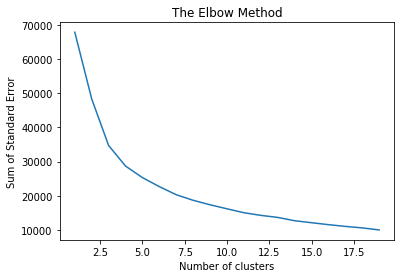

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_transformed1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [50]:
kmeans_2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans_2.fit_predict(X_transformed1)

In [51]:
clustersDf2 = pd.DataFrame(y_kmeans2)
X_transformed1 = pd.DataFrame(X_transformed1)
clustersDf2.columns = ['cluster_predicted']
combinedDf2 = pd.concat([X_transformed1, clustersDf2], axis = 1).reset_index()

In [52]:
combinedDf2 = combinedDf2.drop(columns= 'index')

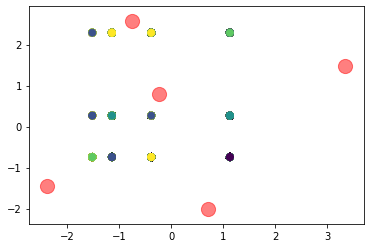

In [53]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans2, s=50, cmap='viridis')

centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# Neural Network Implementation

In [ ]:
combinedDf

In [54]:
X = combinedDf.iloc[:,:-1]
y = combinedDf.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [63]:
classifier = Sequential()

In [64]:
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))


In [65]:
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [66]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
classifier_fit = classifier.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 100)

Train on 3500 samples, validate on 1500 samples
Epoch 1/100
3500/3500 [==============================] - 0s 37us/step - loss: -55.5068 - accuracy: 0.2206 - val_loss: -55.1214 - val_accuracy: 0.2287
Epoch 2/100
3500/3500 [==============================] - 0s 31us/step - loss: -55.5068 - accuracy: 0.2206 - val_loss: -55.1217 - val_accuracy: 0.2287
Epoch 3/100
3500/3500 [==============================] - 0s 31us/step - loss: -55.5068 - accuracy: 0.2206 - val_loss: -55.1218 - val_accuracy: 0.2287
Epoch 4/100
3500/3500 [==============================] - 0s 31us/step - loss: -55.5068 - accuracy: 0.2206 - val_loss: -55.1222 - val_accuracy: 0.2287
Epoch 5/100
3500/3500 [==============================] - 0s 31us/step - loss: -55.4912 - accuracy: 0.2191 - val_loss: -55.0904 - val_accuracy: 0.2273
Epoch 6/100
3500/3500 [==============================] - 0s 32us/step - loss: -55.4898 - accuracy: 0.2191 - val_loss: -55.0921 - val_accuracy: 0.2273
Epoch 7/100
3500/3500 [=============================

Epoch 55/100
3500/3500 [==============================] - 0s 46us/step - loss: -55.5067 - accuracy: 0.2206 - val_loss: -55.1115 - val_accuracy: 0.2280
Epoch 56/100
3500/3500 [==============================] - 0s 45us/step - loss: -55.5068 - accuracy: 0.2206 - val_loss: -55.0915 - val_accuracy: 0.2273
Epoch 57/100
3500/3500 [==============================] - 0s 45us/step - loss: -55.4993 - accuracy: 0.2194 - val_loss: -55.0911 - val_accuracy: 0.2273
Epoch 58/100
3500/3500 [==============================] - 0s 43us/step - loss: -55.5025 - accuracy: 0.2200 - val_loss: -55.1040 - val_accuracy: 0.2280
Epoch 59/100
3500/3500 [==============================] - 0s 43us/step - loss: -55.5013 - accuracy: 0.2200 - val_loss: -55.0973 - val_accuracy: 0.2273
Epoch 60/100
3500/3500 [==============================] - 0s 45us/step - loss: -55.5033 - accuracy: 0.2200 - val_loss: -55.1086 - val_accuracy: 0.2280
Epoch 61/100
3500/3500 [==============================] - 0s 42us/step - loss: -55.5060 - accu